# ***Práctica 4*** : _Tarea de clasificación_ #

### ***Alumna: Roxana Rachel Valencia Ortega*** ###

## ***Dataset:*** _Conjunto de datos de calidad de agua._ ##

Nuestro dataset nos proporciona el conjunto de datos "water_potability" de manera muy clara. En términos sencillos, este conjunto de datos contiene información sobre la calidad del agua y su relación para el consumo humano. Cada fila representa una muestra de agua con diferentes atributos con variables independientes como ph, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, trihalomethanes, turbidity y otra variable dependiente como potability, esta columna muestra que el agua es segura para beber (potable) o no.

En otras palabras, el conjunto de datos nos ayuda a entender si el agua que estamos analizando cumple con los estándares de calidad requeridos para el consumo humano. Esto es esencial para garantizar la salud y el bienestar de las personas que dependen de esa fuente de agua. El objetivo es predecir la potabilidad del agua en función de sus características químicas y físicas. Si "Potabilidad" es igual a 1, el agua es segura para beber; si es igual a 0, no es segura.

***pH:*** El nivel de pH.

***Dureza:*** Dureza del agua, una medida del contenido mineral.

***Sólidos:*** Sólidos totales disueltos.

***Cloraminas:*** Concentración de cloraminas.

***Sulfato:*** Concentración de sulfato.

***Conductividad:*** Conductividad eléctrica.

***Organic_carbon:*** Contenido de carbono orgánico.

***Trihalometanos:*** Concentración de trihalometanos.

***Turbidez:*** Nivel de turbidez, una medida de la claridad.

***Potabilidad:*** Indica la potabilidad del agua con los valores 1 (potable) y 0 (no potable).

In [1]:
pip install pandas_dq

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pandas as dq
import numpy as np
import matplotlib.pyplot as plt
from pandas_dq import dq_report
import seaborn as sns
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Impresión de datos pd ###

In [3]:
df = pd.read_csv(r'water_potability.csv')
print(df)

         ph      Hardness      Solids     Chloramines    Sulfate   \
0          NaN  204.890455  20791.318981   7.300212    368.516441   
1     3.716080  129.422921  18630.057858   6.635246           NaN   
2     8.099124  224.236259  19909.541732   9.275884           NaN   
3     8.316766  214.373394  22018.417441   8.059332    356.886136   
4     9.092223  181.101509  17978.986339   6.546600    310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603   7.166639    359.948574   
3272  7.808856  193.553212  17329.802160   8.061362           NaN   
3273  9.419510  175.762646  33155.578218   7.350233           NaN   
3274  5.126763  230.603758  11983.869376   6.303357           NaN   
3275  7.874671  195.102299  17404.177061   7.509306           NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0      564.308654      10.379783       86.990970     2.963135        0      
1      592.885359

## Análisis exploratorio de dataset ##

Este código genera un histograma que nos permite visualizar los datos, los cuales predominan en un rango ideal, con pH alrededor de 7.

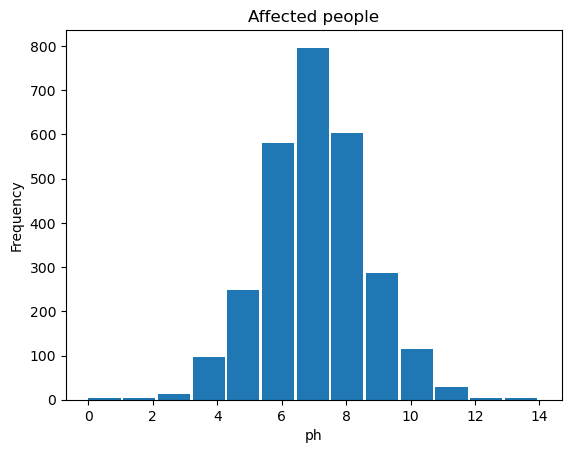

In [4]:
plt.hist(df['ph'], bins=13, width=1.0)
plt.title('Affected people')
plt.xlabel('ph')
plt.ylabel('Frequency')

plt.show()

Este código genera un gráfico de barras para mostrar con qué frecuencia el agua es potable, utilizando el atributo 'Potability' de los datos.

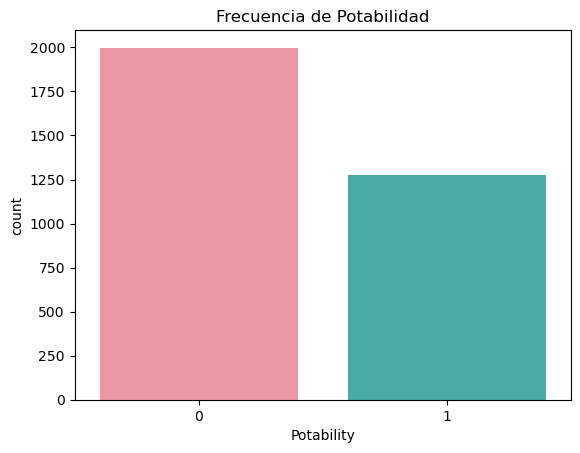

In [5]:
deep_palette = ["#4C72B0"]

# Aplica la paleta de colores personalizada
sns.set_palette(deep_palette)
sns.countplot(data=df, x='Potability')
plt.title('Frecuencia de Potabilidad')
plt.show()

En el gráfico de dispersión presentado, se explora la relación entre dos atributos numéricos: 'ph' y 'Chloramines'. El 'ph' se refiere al nivel de acidez o alcalinidad del agua, mientras que 'Chloramines' hace referencia a las concentraciones de cloraminas en el agua.

Es importante comprender que las cloraminas son un desinfectante que se utiliza en el tratamiento del agua para eliminar microorganismos dañinos, como bacterias y virus. Actúan penetrando las paredes celulares de estos microorganismos y bloqueando su metabolismo. De todas las formas de cloramina, la monocloramina es la más efectiva para la desinfección, ya que reacciona directamente con los aminoácidos en el ADN bacteriano. Durante este proceso, las cloraminas también pueden desactivar la capa protectora de los virus, lo que los hace inofensivos.

Es interesante notar que la cantidad de monocloraminas es más alta cuando el nivel de 'ph' del agua es igual o superior a 7. Sin embargo, es importante destacar que, en términos generales, el 'ph' del agua no interfiere significativamente en la efectividad de las cloraminas como desinfectante. La relación entre 'ph' y 'Chloramines' se refleja en el gráfico de dispersión, y esta información es valiosa para comprender mejor la calidad del agua y sus propiedades desinfectantes.

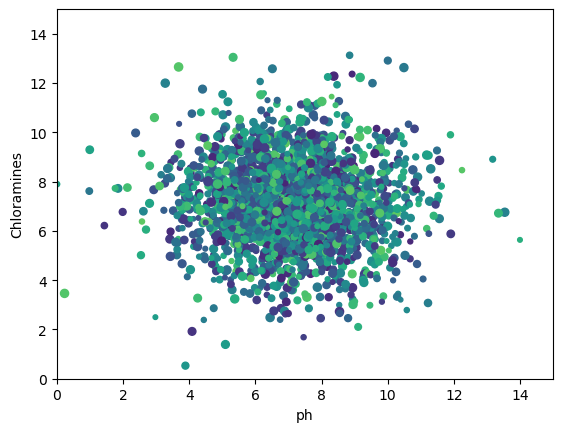

In [67]:
x = df['ph']  
y = df['Chloramines']   

sizes = np.random.uniform(10, 35, len(df['ph']))
colors = np.random.uniform(10, 75, len(df['Chloramines']))

fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

plt.xlabel('ph')  
plt.ylabel('Chloramines')   

ax.set(xlim=(0, 15), ylim=(0, 15)) 
plt.show()

El gráfico de dispersión con sns.pairplot es una herramienta útil para visualizar la relación entre múltiples atributos y la variable objetivo "Potability" en tu conjunto de datos. Nos permite identificar patrones y posibles relaciones que pueden ser importantes para comprender la potabilidad del agua.

/Users/roxanarachel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/pp/wmccm1s10r7fdx87b695vhqw0000gn/T/ipykernel_26799/2731181175.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


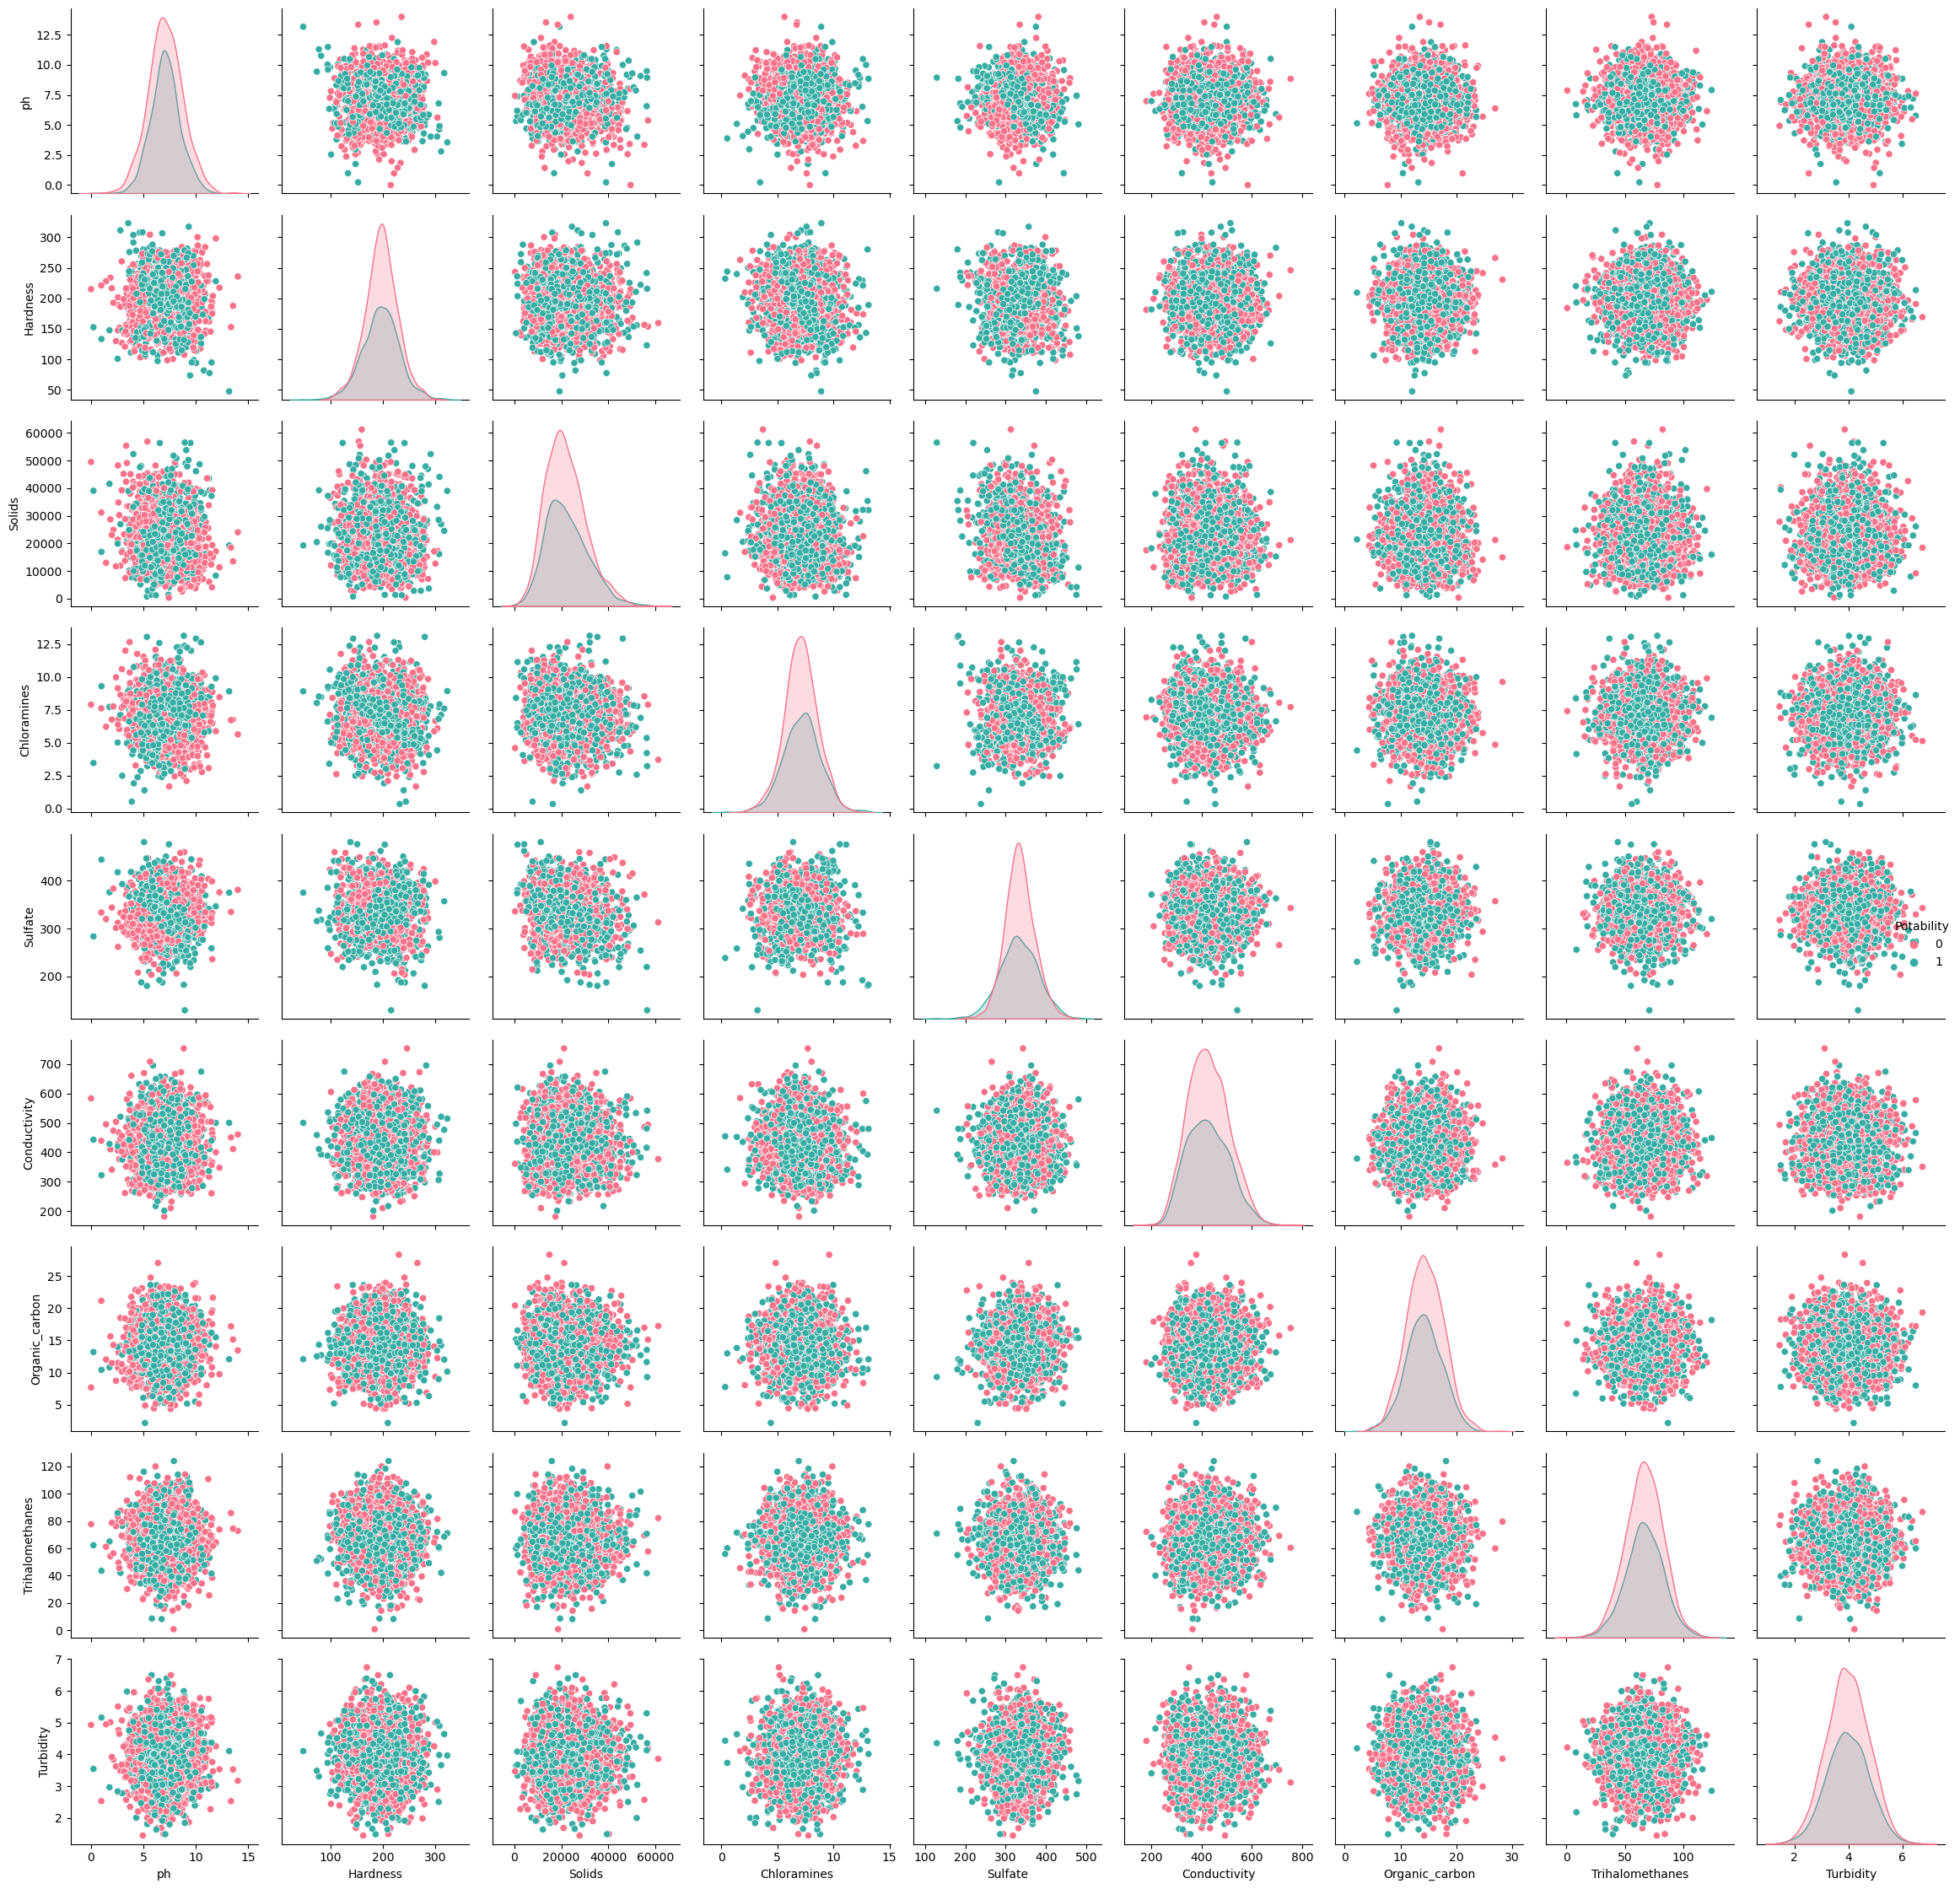

In [62]:
sns.pairplot(df, hue='Potability')
plt.tight_layout()
plt.show()

## Limpieza de datos ##

En este caso se desplegó rápidamente el número de valores atípicos en nuestros datos. Este codigo  esta diseñado para generar un informe o realizar análisis relacionados con la calidad de datos. 

In [7]:
dq_report(df, target=None, verbose=1)
df

ph      Hardness      Solids     Chloramines    Sulfate   \
0          NaN  204.890455  20791.318981   7.300212    368.516441   
1     3.716080  129.422921  18630.057858   6.635246           NaN   
2     8.099124  224.236259  19909.541732   9.275884           NaN   
3     8.316766  214.373394  22018.417441   8.059332    356.886136   
4     9.092223  181.101509  17978.986339   6.546600    310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603   7.166639    359.948574   
3272  7.808856  193.553212  17329.802160   8.061362           NaN   
3273  9.419510  175.762646  33155.578218   7.350233           NaN   
3274  5.126763  230.603758  11983.869376   6.303357           NaN   
3275  7.874671  195.102299  17404.177061   7.509306           NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0      564.308654      10.379783       86.990970     2.963135        0      
1      592.885359      15.180013       56.329076     4.500656        0      
2      418.606213      16.868637       66.420093     3.055934        0      
3      363.266516      18.436524      100.341674     4.628771        0      
4      398.410813      11.558279       31.997993     4.075075        0      
...            ...             ...              ...        ...         ...  
3271   526.424171      13.894419       66.687695     4.435821        1      
3272   392.449580      19.903225             NaN     2.798243        1      
3273   432.044783      11.039070       69.845400     3.298875        1      
3274   402.883113      11.168946       77.488213     4.708658        1      
3275   327.459760      16.140368       78.698446     2.309149        1      

[3276 rows x 10 columns]

Este código nos permite limpiar el conjunto de datos eliminando las filas que contienen al menos un valor nulo en las columnas que elegimos. Los datos limpios resultantes son útiles para la posterior evaluación de algoritmos de inferencia y análisis de datos.

In [8]:
subset_of_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
df_clean = df.dropna(subset=subset_of_columns, how='any')
df_clean

ph       Hardness      Solids     Chloramines    Sulfate   \
3      8.316766  214.373394  22018.417441   8.059332    356.886136   
4      9.092223  181.101509  17978.986339   6.546600    310.135738   
5      5.584087  188.313324  28748.687739   7.544869    326.678363   
6     10.223862  248.071735  28749.716544   7.513408    393.663396   
7      8.635849  203.361523  13672.091764   4.563009    303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018   6.297312    312.931022   
3268   6.702547  207.321086  17246.920347   7.708117    304.510230   
3269  11.491011   94.812545  37188.826022   9.263166    258.930600   
3270   6.069616  186.659040  26138.780191   7.747547    345.700257   
3271   4.668102  193.681735  47580.991603   7.166639    359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3      363.266516      18.436524      100.341674     4.628771        0      
4      398.410813      11.558279       31.997993     4.075075        0      
5      280.467916       8.399735       54.917862     2.559708        0      
6      283.651634      13.789695       84.603556     2.672989        0      
7      474.607645      12.363817       62.798309     4.401425        0      
...            ...             ...              ...        ...         ...  
3267   390.410231       9.899115       55.069304     4.613843        1      
3268   329.266002      16.217303       28.878601     3.442983        1      
3269   439.893618      16.172755       41.558501     4.369264        1      
3270   415.886955      12.067620       60.419921     3.669712        1      
3271   526.424171      13.894419       66.687695     4.435821        1      

[2011 rows x 10 columns]

Se puede mencionar la diferencia principal entre los datos originales `df` tienen 3276 filas y 10 columna, en cambio los datos reducidos `df_clean` tienen 2011 filas y 10 columnas. `df` contiene todos los datos originales sin cambios, mientras que `df_clean` es una versión filtrada y reducida que excluye filas con valores nulos en columnas específicas. La elección entre ambos depende de los requisitos del análisis de datos. `df_clean` se utiliza cuando se necesita trabajar con un conjunto de datos más limpio y completo, eliminando las filas con valores faltantes en las columnas de interés. Este proceso de limpieza es común en el análisis de datos para garantizar la calidad y evitar distorsiones causadas por valores faltantes.

A partir de este punto, nos enfocaremos en el análisis y modelado de datos utilizando el conjunto `df_clean`, que representa nuestros datos reducidos. Este paso de preprocesamiento es esencial para garantizar la calidad y confiabilidad de los datos con los que trabajamos.

La razón detrás de este enfoque radica en la necesidad de lidiar con datos completos y libres de valores nulos, lo que es fundamental para obtener resultados precisos. Al eliminar las filas que contenían valores faltantes en las columnas específicas seleccionadas, hemos reducido el conjunto de datos a 2011 registros, lo que significa que ahora trabajamos con información más sólida y confiable en cada una de las 10 columnas.

El siguiente código crea dos matrices NumPy, X e y. La matriz X contiene las características del conjunto de datos que se utilizan como variables independientes, mientras que la matriz y contiene la variable dependiente 'Potability' que se busca predecir.

In [9]:
X = df_clean[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']].values
y = df_clean['Potability'].values

Lo siguiente realiza importaciones de clasificadores y configuraciones desde la biblioteca scikit-learn, y señala que cada uno de estos clasificadores es una técnica de aprendizaje automático utilizada para clasificar datos. Además, menciona que cada clasificador tiene características específicas y es apropiado para distintos tipos de problemas de clasificación.

In [59]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import DecisionBoundaryDisplay

estimator1 = GaussianNB()
estimator2 = KNeighborsClassifier(3)
estimator3 = SVC(kernel="linear", C=0.025, random_state=42)
estimator4 = DecisionTreeClassifier(max_depth=5, random_state=42)
estimator5 = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)
estimator6 = GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42)
estimator7 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
estimator8 = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, random_state=42)
estimator9 = ExtraTreesClassifier(n_estimators=100, random_state=42)
estimator10 = HistGradientBoostingClassifier(max_iter=100, random_state=42)

A continuacion los siguientes códigos a continucacion realiza una evaluación exhaustiva del rendimiento de los modelo de clasificación utilizando K-fold cross-validation y calcula varias métricas importantes, como la matriz de confusión, la sensibilidad, la especificidad y un informe de clasificación detallado. Estas métricas ayudan a comprender como funciona el modelo en la tarea de clasificación.

In [11]:
# Results from Naive Bayes

# Realizar predicciones utilizando K-fold cross-validation
predicted = cross_val_predict(estimator1, X, y, cv=10)  # 'cv' es el número de splits (K en K-fold)

print("Resultados de Naive Bayes")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, predicted)
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular sensibilidad y especificidad
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensibilidad (Recall): {sensitivity}")
print(f"Especificidad: {specificity}")

# Imprimir un informe de clasificación detallado
print("Informe de Clasificación:")
print(classification_report(y, predicted))

Resultados de Naive Bayes
Matriz de Confusión:
[[1039  161]
 [ 606  205]]
Sensibilidad (Recall): 0.2527743526510481
Especificidad: 0.8658333333333333
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.63      0.87      0.73      1200
           1       0.56      0.25      0.35       811

    accuracy                           0.62      2011
   macro avg       0.60      0.56      0.54      2011
weighted avg       0.60      0.62      0.58      2011



In [12]:
# Results from kNN

# Realizar predicciones utilizando K-fold cross-validation
predicted = cross_val_predict(estimator2, X, y, cv=10)  # 'cv' es el número de splits (K en K-fold)

print("Resultados de k-Nearest Neighbors")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, predicted)
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular sensibilidad y especificidad
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensibilidad (Recall): {sensitivity}")
print(f"Especificidad: {specificity}")

# Imprimir un informe de clasificación detallado
print("Informe de Clasificación:")
print(classification_report(y, predicted))

Resultados de k-Nearest Neighbors
Matriz de Confusión:
[[813 387]
 [535 276]]
Sensibilidad (Recall): 0.3403205918618989
Especificidad: 0.6775
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.60      0.68      0.64      1200
           1       0.42      0.34      0.37       811

    accuracy                           0.54      2011
   macro avg       0.51      0.51      0.51      2011
weighted avg       0.53      0.54      0.53      2011



In [13]:
# Results from SVN.

# Realizar predicciones utilizando K-fold cross-validation
predicted = cross_val_predict(estimator3, X, y, cv=10)  # 'cv' es el número de splits (K en K-fold)

print("Resultados de Support Vector Classification")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, predicted)
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular sensibilidad y especificidad
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensibilidad (Recall): {sensitivity}")
print(f"Especificidad: {specificity}")

# Imprimir un informe de clasificación detallado
print("Informe de Clasificación:")
print(classification_report(y, predicted))

Resultados de Support Vector Classification
Matriz de Confusión:
[[1185   15]
 [ 799   12]]
Sensibilidad (Recall): 0.014796547472256474
Especificidad: 0.9875
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.60      0.99      0.74      1200
           1       0.44      0.01      0.03       811

    accuracy                           0.60      2011
   macro avg       0.52      0.50      0.39      2011
weighted avg       0.54      0.60      0.46      2011



In [14]:
# Results from Decision Tree.

# Realizar predicciones utilizando K-fold cross-validation
predicted = cross_val_predict(estimator4, X, y, cv=10)  # 'cv' es el número de splits (K en K-fold)

print("Resultados de Decision Tree")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, predicted)
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular sensibilidad y especificidad
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensibilidad (Recall): {sensitivity}")
print(f"Especificidad: {specificity}")

# Imprimir un informe de clasificación detallado
print("Informe de Clasificación:")
print(classification_report(y, predicted))

Resultados de Decision Tree
Matriz de Confusión:
[[1051  149]
 [ 621  190]]
Sensibilidad (Recall): 0.2342786683107275
Especificidad: 0.8758333333333334
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.63      0.88      0.73      1200
           1       0.56      0.23      0.33       811

    accuracy                           0.62      2011
   macro avg       0.59      0.56      0.53      2011
weighted avg       0.60      0.62      0.57      2011



In [15]:
# Results from Random Forest.

# Realizar predicciones utilizando K-fold cross-validation
predicted = cross_val_predict(estimator5, X, y, cv=10)  # 'cv' es el número de splits (K en K-fold)

print("Resultados de Random Forestn")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, predicted)
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular sensibilidad y especificidad
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensibilidad (Recall): {sensitivity}")
print(f"Especificidad: {specificity}")

# Imprimir un informe de clasificación detallado
print("Informe de Clasificación:")
print(classification_report(y, predicted))

Resultados de Random Forestn
Matriz de Confusión:
[[1153   47]
 [ 752   59]]
Sensibilidad (Recall): 0.07274969173859433
Especificidad: 0.9608333333333333
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.61      0.96      0.74      1200
           1       0.56      0.07      0.13       811

    accuracy                           0.60      2011
   macro avg       0.58      0.52      0.44      2011
weighted avg       0.59      0.60      0.50      2011



In [16]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [17]:
# Results from Gaussian.

# Realizar predicciones utilizando K-fold cross-validation
predicted = cross_val_predict(estimator6, X, y, cv=10)  # 'cv' es el número de splits (K en K-fold)

print("Resultados de Gaussian")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, predicted)
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular sensibilidad y especificidad
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensibilidad (Recall): {sensitivity}")
print(f"Especificidad: {specificity}")

# Imprimir un informe de clasificación detallado
print("Informe de Clasificación:")
print(classification_report(y, predicted))

Resultados de Gaussian
Matriz de Confusión:
[[1173   27]
 [ 787   24]]
Sensibilidad (Recall): 0.029593094944512947
Especificidad: 0.9775
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.60      0.98      0.74      1200
           1       0.47      0.03      0.06       811

    accuracy                           0.60      2011
   macro avg       0.53      0.50      0.40      2011
weighted avg       0.55      0.60      0.47      2011



In [18]:
# Results from Gradient Boostings.

# Realizar predicciones utilizando K-fold cross-validation
predicted = cross_val_predict(estimator7, X, y, cv=10)  # 'cv' es el número de splits (K en K-fold)

print("Resultados de Gradient Boosting")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, predicted)
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular sensibilidad y especificidad
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensibilidad (Recall): {sensitivity}")
print(f"Especificidad: {specificity}")

# Imprimir un informe de clasificación detallado
print("Informe de Clasificación:")
print(classification_report(y, predicted))

Resultados de Gradient Boosting
Matriz de Confusión:
[[941 259]
 [592 219]]
Sensibilidad (Recall): 0.27003699136868065
Especificidad: 0.7841666666666667
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.61      0.78      0.69      1200
           1       0.46      0.27      0.34       811

    accuracy                           0.58      2011
   macro avg       0.54      0.53      0.51      2011
weighted avg       0.55      0.58      0.55      2011



In [60]:
# Results from MLP.

# Realizar predicciones utilizando K-fold cross-validation
predicted = cross_val_predict(estimator8, X, y, cv=10)  # 'cv' es el número de splits (K en K-fold)

print("Resultados de Multilayer Perceptron")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, predicted)
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular sensibilidad y especificidad
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensibilidad (Recall): {sensitivity}")
print(f"Especificidad: {specificity}")

# Imprimir un informe de clasificación detallado
print("Informe de Clasificación:")
print(classification_report(y, predicted))

Resultados de Multilayer Perceptron
Matriz de Confusión:
[[926 274]
 [633 178]]
Sensibilidad (Recall): 0.21948212083847102
Especificidad: 0.7716666666666666
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.59      0.77      0.67      1200
           1       0.39      0.22      0.28       811

    accuracy                           0.55      2011
   macro avg       0.49      0.50      0.48      2011
weighted avg       0.51      0.55      0.51      2011



In [20]:
# Results from ExtraTrees.

# Realizar predicciones utilizando K-fold cross-validation
predicted = cross_val_predict(estimator9, X, y, cv=10)  # 'cv' es el número de splits (K en K-fold)

print("Resultados de Extremely Randomized Trees")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, predicted)
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular sensibilidad y especificidad
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensibilidad (Recall): {sensitivity}")
print(f"Especificidad: {specificity}")

# Imprimir un informe de clasificación detallado
print("Informe de Clasificación:")
print(classification_report(y, predicted))

Resultados de Extremely Randomized Trees
Matriz de Confusión:
[[1046  154]
 [ 526  285]]
Sensibilidad (Recall): 0.35141800246609123
Especificidad: 0.8716666666666667
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.67      0.87      0.75      1200
           1       0.65      0.35      0.46       811

    accuracy                           0.66      2011
   macro avg       0.66      0.61      0.61      2011
weighted avg       0.66      0.66      0.63      2011



In [21]:
# Results from HistGradientBoosting.

# Realizar predicciones utilizando K-fold cross-validation
predicted = cross_val_predict(estimator10, X, y, cv=10)  # 'cv' es el número de splits (K en K-fold)

print("Resultados de Gradient Boosting")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, predicted)
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular sensibilidad y especificidad
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensibilidad (Recall): {sensitivity}")
print(f"Especificidad: {specificity}")

# Imprimir un informe de clasificación detallado
print("Informe de Clasificación:")
print(classification_report(y, predicted))

Resultados de Gradient Boosting
Matriz de Confusión:
[[914 286]
 [446 365]]
Sensibilidad (Recall): 0.45006165228113443
Especificidad: 0.7616666666666667
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1200
           1       0.56      0.45      0.50       811

    accuracy                           0.64      2011
   macro avg       0.62      0.61      0.61      2011
weighted avg       0.63      0.64      0.63      2011



El modelo de clasificación óptimo para este conjunto de datos resultó ser "Extremely Randomized Trees", destacándose como la elección más acertada entre los 10 modelos evaluados. Este algoritmo de aprendizaje automático, una variante del conocido "Random Forest", se inscribe en la categoría de algoritmos de "ensamble" (ensemble learning). Su característica distintiva radica en su enfoque hacia la mejora de la aleatorización en la construcción de árboles de decisión, lo que le confiere una mayor robustez y una menor susceptibilidad al sobreajuste.

In [61]:
df_clean

ph       Hardness      Solids     Chloramines    Sulfate   \
3      8.316766  214.373394  22018.417441   8.059332    356.886136   
4      9.092223  181.101509  17978.986339   6.546600    310.135738   
5      5.584087  188.313324  28748.687739   7.544869    326.678363   
6     10.223862  248.071735  28749.716544   7.513408    393.663396   
7      8.635849  203.361523  13672.091764   4.563009    303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018   6.297312    312.931022   
3268   6.702547  207.321086  17246.920347   7.708117    304.510230   
3269  11.491011   94.812545  37188.826022   9.263166    258.930600   
3270   6.069616  186.659040  26138.780191   7.747547    345.700257   
3271   4.668102  193.681735  47580.991603   7.166639    359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3      363.266516      18.436524      100.341674     4.628771        0      
4      398.410813      11.558279       31.997993     4.075075        0      
5      280.467916       8.399735       54.917862     2.559708        0      
6      283.651634      13.789695       84.603556     2.672989        0      
7      474.607645      12.363817       62.798309     4.401425        0      
...            ...             ...              ...        ...         ...  
3267   390.410231       9.899115       55.069304     4.613843        1      
3268   329.266002      16.217303       28.878601     3.442983        1      
3269   439.893618      16.172755       41.558501     4.369264        1      
3270   415.886955      12.067620       60.419921     3.669712        1      
3271   526.424171      13.894419       66.687695     4.435821        1      

[2011 rows x 10 columns]

En las siguientes lineas de código, se reauna la reducción de dimensionalidad en los datos contenidos en df_clean. Posteriormente, aplicara el mejor clasificador mencionado anteriormente en el conjuntos de datos transformados, utilizando un enfoque de reducción de dimensionalidad conocido como t-Distributed Stochastic Neighbor Embedding (t-SNE). Como resultado, se obtuvo un valor de sensibilidad de 0.36744759556103573, que sigue siendo el más alto en comparación con los resultados anteriores obtenidos con PCA y LDA.

In [45]:
from sklearn.manifold import TSNE
X_TSNE = TSNE().fit_transform(X)

In [46]:
# Results from ExtraTrees.

# Realizar predicciones utilizando K-fold cross-validation
predicted = cross_val_predict(estimator9, X_TSNE, y, cv=10)  # 'cv' es el número de splits (K en K-fold)

print("Resultados de Extremely Randomized Trees")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, predicted)
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular sensibilidad y especificidad
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print(f"Sensibilidad (Recall): {sensitivity}")
print(f"Especificidad: {specificity}")

# Imprimir un informe de clasificación detallado
print("Informe de Clasificación:")
print(classification_report(y, predicted))

Resultados de Extremely Randomized Trees
Matriz de Confusión:
[[776 424]
 [513 298]]
Sensibilidad (Recall): 0.36744759556103573
Especificidad: 0.6466666666666666
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62      1200
           1       0.41      0.37      0.39       811

    accuracy                           0.53      2011
   macro avg       0.51      0.51      0.51      2011
weighted avg       0.53      0.53      0.53      2011



## Conclusión ##

En esta práctica, realizamos una serie de procesamientos en el conjunto de datos "water_potability". Comenzamos analizando los datos para comprender su estructura y las relaciones entre los atributos. Luego, llevamos a cabo un proceso de limpieza de datos para garantizar que los datos estuvieran en un estado adecuado para su posterior análisis.

Una vez que obtuvimos el DataFrame limpio, lo utilizamos para construir y evaluar varios modelos de inferencia. La evaluación de estos modelos se realizó mediante validación cruzada con k=10, utilizando la biblioteca scikit-learn. Tras comparar el rendimiento de los 10 modelos, seleccionamos "Extremely Randomized Trees" como el modelo óptimo, ya que mostró el mejor rendimiento en comparación con los otros modelos.

Luego, aplicamos este modelo óptimo en un espacio de características modificado utilizando t-SNE (t-Distributed Stochastic Neighbor Embedding). Este enfoque nos permitió reducir la dimensionalidad de los datos y proyectarlos en un espacio diferente. El resultado de esta proyección en t-SNE fue muy favorable en comparación con los resultados obtenidos utilizando PCA y LDA, donde estos últimos mostraron resultados menos satisfactorios.

Si bien mis datos no son óptimos para este tipo de procesamiento, esta práctica proporciona una metodología completa y valiosa para abordar problemas de clasificación de datos en situaciones del mundo real. A pesar de las limitaciones en los datos, los pasos y enfoques utilizados son altamente aplicables a una amplia gama de problemas en el campo del aprendizaje automático y la ciencia de datos. Esto convierte a esta práctica en una herramienta valiosa que no solo resuelve un problema específico, sino que también sirve como un ejemplo sólido de un enfoque metodológico integral.

La metodología abarca desde la exploración inicial de datos, que es esencial para comprender la calidad y la estructura de los datos, hasta la selección de un modelo óptimo a través de la comparación y la evaluación de varios modelos. Además, la inclusión de la validación cruzada asegura resultados más confiables. Por tanto esta práctica no solo es útil para resolver el problema abordado, sino que también puede ser una guía útil para futuros proyectos en el campo de la ciencia de datos y el aprendizaje automático.